## Evolution of the attack and defense parameters
I'm interested in how the modelled defense and attack parameters evolve from week to week for a team that has just joined the premiership and for one who has been in there a while. 

In the 21/22 year Norwich City (NOR) were promoted to the Championship.

In [25]:
from airsenal.framework.utils import *
from airsenal.framework.bpl_interface import get_fitted_team_model, get_training_data, create_and_fit_team_model
from airsenal.framework.season import get_current_season, get_teams_for_season

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import jax.numpy as jnp

%matplotlib inline

Make a model for the 21/22 season, and look at the first game week

In [2]:
season = "2122"
gameweek = 1
max_game_week = get_max_gameweek(season=season,
                                 dbsession=session)

In [ ]:
model_team = get_fitted_team_model(season = season,
                                   gameweek = gameweek,
                                   dbsession = session)

In [ ]:
current_teams = get_teams_for_season(season, session)

# Get the index of the teams who are present in this season with respect to the team model
current_idx = {team: idx for idx, team in enumerate(model_team.teams)
               if team in current_teams}

In [ ]:
# Plot the attack parameter after game week 1
ax = plt.figure(figsize=(15, 5)).gca()
for team in ['NOR', 'MCI']:
    sns.kdeplot(model_team.attack[:, current_idx[team]], label=team)
plt.title('Attack Strength of the Team for GameWeek 1')
plt.legend()
plt.show()

In [ ]:
season_attack_progression = np.zeros((1000, max_game_week, 2))

In [ ]:
season_attack_progression[:,0,0] = model_team.attack[:, current_idx['NOR']]
season_attack_progression[:,0,1] = model_team.attack[:, current_idx['MCI']]

In [ ]:
for i, team in enumerate(['NOR', 'MCI']):
    print(i, team)

## Look at the first 5 weeks of the season

In [3]:
# Make empty array for data
max_game_week = 5 # Placeholder - will be 38 or whatever for the full run
season_attack_progression = np.zeros((1000, max_game_week, 2))

In [4]:
for gw in range(max_game_week):
    # Making the model
    model_team = get_fitted_team_model(season = season,
                                   gameweek = gw+1,
                                   dbsession = session)
    if gw == 0:
        current_teams = get_teams_for_season(season, session)
        # Get the index of the teams who are present in this season with respect to the team model
        current_idx = {team: idx for idx, team in enumerate(model_team.teams)
                       if team in current_teams}
    
    # Save data to array
    for i, team in enumerate(['BRE', 'MCI']):
        season_attack_progression[:,gw,i] = model_team.attack[:, current_idx[team]]

Fitting team model...


sample: 100%|████████████████████████████████████████| 1500/1500 [00:12<00:00, 118.87it/s, 127 steps of size 4.45e-02. acc. prob=0.94]


Adding BRE to team model with covariates
Fitting team model...


sample: 100%|████████████████████████████████████████| 1500/1500 [00:12<00:00, 118.90it/s, 127 steps of size 4.53e-02. acc. prob=0.94]


Fitting team model...


sample: 100%|████████████████████████████████████████| 1500/1500 [00:10<00:00, 145.81it/s, 127 steps of size 5.22e-02. acc. prob=0.91]


Fitting team model...


sample: 100%|█████████████████████████████████████████| 1500/1500 [00:10<00:00, 147.24it/s, 63 steps of size 5.69e-02. acc. prob=0.90]


Fitting team model...


sample: 100%|█████████████████████████████████████████| 1500/1500 [00:10<00:00, 146.74it/s, 63 steps of size 5.62e-02. acc. prob=0.90]


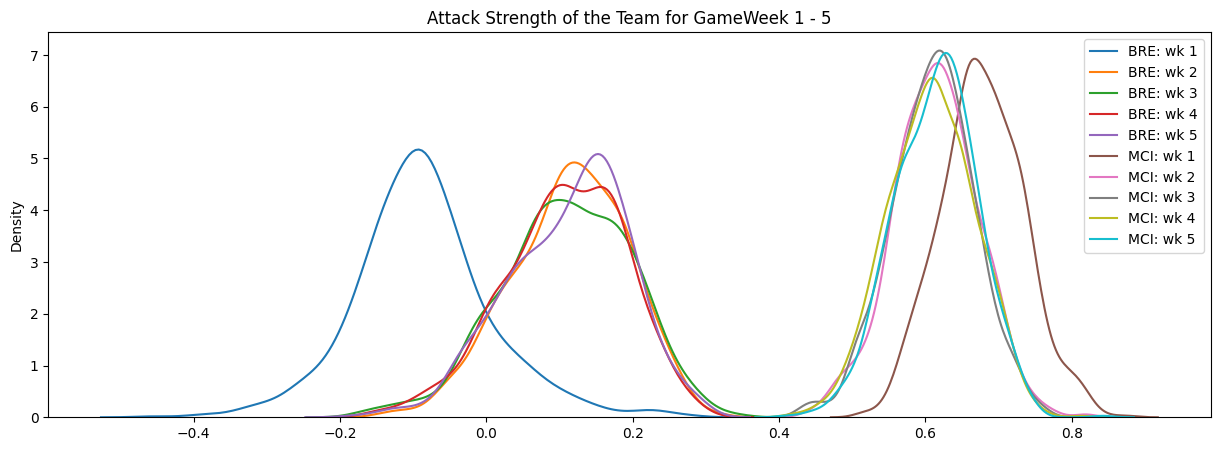

In [43]:
# Plot the attack parameter after game week 1- 5
ax = plt.figure(figsize=(15, 5)).gca()
for t_idx, team in enumerate(["BRE", "MCI"]):
    for gw_idx in range(max_game_week):
        sns.kdeplot(season_attack_progression[:,gw_idx,t_idx], label=f"{team}: wk {gw_idx+1}")
# season_attack_progression
plt.title('Attack Strength of the Team for GameWeek 1 - 5')
plt.legend()
plt.show()

In [ ]:
for i in range(max_game_week):
    print(i)

In [11]:
bre = []
mci = []
for gw_idx in range(max_game_week):
    bre.append(np.mean(season_attack_progression[:,gw_idx,0]))
    mci.append(np.mean(season_attack_progression[:,gw_idx,1]))

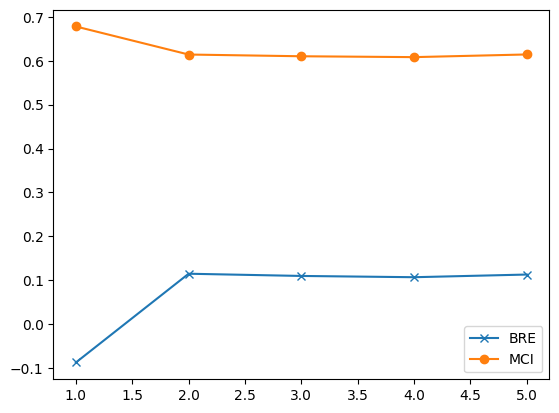

In [20]:
plt.plot([1,2,3,4,5],bre, label="BRE", marker="x")
plt.plot([1,2,3,4,5],mci, label="MCI", marker="o")
plt.legend()
plt.show()

In [27]:
from airsenal.framework.bpl_interface import  get_result_dict
def get_training_data(season, gameweek, dbsession, ratings=False):
    training_data = get_result_dict(season, gameweek, dbsession)
    if ratings:
        teams = set(training_data["home_team"]) | set(training_data["away_team"])
        training_data["team_covariates"] = get_ratings_dict(season, teams, dbsession)
    return training_data

training_data = get_training_data(season = "2122",
                                  gameweek = 1,
                                  dbsession = session)

team_model = create_and_fit_team_model(training_data)

sample: 100%|█████████████████████████████████████████| 1500/1500 [00:05<00:00, 258.70it/s, 31 steps of size 1.79e-01. acc. prob=0.91]


In [34]:
team_model.__dict__['teams']

['ARS',
 'AVL',
 'BHA',
 'BOU',
 'BUR',
 'CAR',
 'CHE',
 'CRY',
 'EVE',
 'FUL',
 'HUD',
 'HUL',
 'LEE',
 'LEI',
 'LIV',
 'MCI',
 'MID',
 'MUN',
 'NEW',
 'NOR',
 'SHU',
 'SOU',
 'STK',
 'SUN',
 'SWA',
 'TOT',
 'WAT',
 'WBA',
 'WHU',
 'WOL']

In [44]:
training_data

{'home_team': array(['FUL', 'CRY', 'LIV', ..., 'MID', 'SOU', 'MCI'], dtype='<U3'),
 'away_team': array(['ARS', 'SOU', 'LEE', ..., 'STK', 'WAT', 'SUN'], dtype='<U3'),
 'home_goals': array([0, 1, 4, ..., 1, 1, 2]),
 'away_goals': array([3, 0, 3, ..., 1, 1, 1])}